In [76]:
# pip install seaborn
# !pip install xgboost
# !pip install scikit-learn

In [77]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

import xgboost as xgb


In [78]:
# emission_data.index <- checks the index of the dataframe
# pd.to_date(emisson_data.index) <- change the index format to date or date and time


In [79]:
emission_data = pd.read_csv('C:\\Users\\harve\\Downloads\\emission_subset_data.csv', low_memory=False)

In [80]:
emission_data.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.653_30.447_2020_07,-0.653,30.447,2020,7,0.000208,1.016010,0.000193,0.190001,-40.803835,...,5257.306532,62326.977820,4257.306491,17.894679,0.306607,-13.248185,50.381209,-125.139713,21.541898,30.563665
1,ID_-0.677_29.623_2019_37,-0.677,29.623,2019,37,-0.000083,0.811401,-0.000063,0.102140,-12.286668,...,4476.434884,67692.826010,3476.434974,8.947211,0.276204,-55.328865,36.840545,-84.378292,28.871976,1.473525
2,ID_-0.637_30.763_2020_14,-0.637,30.763,2020,14,0.000553,1.302465,0.000705,0.245021,-12.425961,...,6949.097525,52197.326133,5949.097557,16.323798,0.314789,4.330702,39.859551,-65.006719,22.068414,47.354683
3,ID_-0.659_30.341_2019_08,-0.659,30.341,2019,8,-0.000102,0.779783,-0.000078,0.086941,-99.783999,...,3387.797461,66149.163851,2784.094291,21.282596,0.276451,-24.948915,42.175335,-113.278999,22.552303,20.881190
4,ID_-0.667_30.433_2021_46,-0.667,30.433,2021,46,-0.000124,1.363959,-0.000169,0.297181,-102.464401,...,7462.535046,48334.116599,6540.481319,23.370549,0.334601,-42.276939,35.956505,-126.433335,32.902799,106.035100


In [81]:
emission_data.columns

Index(['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide

In [82]:
emission_data_datatypes = {}

column = 0
for column in emission_data.columns:
    emission_data_datatypes[column] = emission_data[column].dtypes

In [83]:
emission_data_datatypes

{'ID_LAT_LON_YEAR_WEEK': dtype('O'),
 'latitude': dtype('float64'),
 'longitude': dtype('float64'),
 'year': dtype('int64'),
 'week_no': dtype('int64'),
 'SulphurDioxide_SO2_column_number_density': dtype('float64'),
 'SulphurDioxide_SO2_column_number_density_amf': dtype('float64'),
 'SulphurDioxide_SO2_slant_column_number_density': dtype('float64'),
 'SulphurDioxide_cloud_fraction': dtype('float64'),
 'SulphurDioxide_sensor_azimuth_angle': dtype('float64'),
 'SulphurDioxide_sensor_zenith_angle': dtype('float64'),
 'SulphurDioxide_solar_azimuth_angle': dtype('float64'),
 'SulphurDioxide_solar_zenith_angle': dtype('float64'),
 'SulphurDioxide_SO2_column_number_density_15km': dtype('float64'),
 'CarbonMonoxide_CO_column_number_density': dtype('float64'),
 'CarbonMonoxide_H2O_column_number_density': dtype('float64'),
 'CarbonMonoxide_cloud_height': dtype('float64'),
 'CarbonMonoxide_sensor_altitude': dtype('float64'),
 'CarbonMonoxide_sensor_azimuth_angle': dtype('float64'),
 'CarbonMonoxi

In [84]:

# Step 1: Create a new column 'date' by combining 'year' and 'week_number'
emission_data['date'] = emission_data.apply(lambda row: pd.to_datetime(f'{row["year"]}-W{int(row["week_no"])}-1', format='%G-W%V-%u'), axis=1)

# Step 2: Extract day and month into new columns
emission_data['day'] = emission_data['date'].dt.day
emission_data['month'] = emission_data['date'].dt.month
emission_data['quarter'] = emission_data['date'].dt.quarter

# Drop first three columns
drop_columns = [0,1,2]
emission_data = emission_data.drop(emission_data.columns[drop_columns], axis = 1)

emission_data.head()

,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,...,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,date,day,month,quarter
0,2020,7,0.000208,1.016010,0.000193,0.190001,-40.803835,34.844240,-116.784180,25.561881,...,0.306607,-13.248185,50.381209,-125.139713,21.541898,30.563665,2020-02-10,10,2,1
1,2019,37,-0.000083,0.811401,-0.000063,0.102140,-12.286668,35.350230,-84.118378,25.428967,...,0.276204,-55.328865,36.840545,-84.378292,28.871976,1.473525,2019-09-09,9,9,3
2,2020,14,0.000553,1.302465,0.000705,0.245021,-12.425961,19.547202,-69.510319,23.914619,...,0.314789,4.330702,39.859551,-65.006719,22.068414,47.354683,2020-03-30,30,3,1
3,2019,8,-0.000102,0.779783,-0.000078,0.086941,-99.783999,36.939301,-108.757054,26.180184,...,0.276451,-24.948915,42.175335,-113.278999,22.552303,20.881190,2019-02-18,18,2,1
4,2021,46,-0.000124,1.363959,-0.000169,0.297181,-102.464401,5.534767,-125.162659,32.117619,...,0.334601,-42.276939,35.956505,-126.433335,32.902799,106.035100,2021-11-15,15,11,4


In [85]:
emission_data = emission_data.set_index('date')

emission_data.head()

,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,...,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,day,month,quarter
date,,,,,,,,,,,,,,,,,,,,,
2020-02-10,2020,7,0.000208,1.016010,0.000193,0.190001,-40.803835,34.844240,-116.784180,25.561881,...,17.894679,0.306607,-13.248185,50.381209,-125.139713,21.541898,30.563665,10,2,1
2019-09-09,2019,37,-0.000083,0.811401,-0.000063,0.102140,-12.286668,35.350230,-84.118378,25.428967,...,8.947211,0.276204,-55.328865,36.840545,-84.378292,28.871976,1.473525,9,9,3
2020-03-30,2020,14,0.000553,1.302465,0.000705,0.245021,-12.425961,19.547202,-69.510319,23.914619,...,16.323798,0.314789,4.330702,39.859551,-65.006719,22.068414,47.354683,30,3,1
2019-02-18,2019,8,-0.000102,0.779783,-0.000078,0.086941,-99.783999,36.939301,-108.757054,26.180184,...,21.282596,0.276451,-24.948915,42.175335,-113.278999,22.552303,20.881190,18,2,1
2021-11-15,2021,46,-0.000124,1.363959,-0.000169,0.297181,-102.464401,5.534767,-125.162659,32.117619,...,23.370549,0.334601,-42.276939,35.956505,-126.433335,32.902799,106.035100,15,11,4


In [101]:
# Check the unique values for year and weeks

unique_values_week = emission_data['week_no'].unique()

unique_values_year = emission_data['year'].unique()

print(unique_values_week)

# print(unique_values_year)

[ 7 37 14  8 46 50 24 39 52 27 20 25 19 16 23 10 44  1 45  6  4 32 31 38
 22  9 12 29 15 35 11 21 36 42 49 18 30  0 17 26  3 28  2 47 48 33 40  5
 43 34 51 41 13]


In [87]:
# Anomalies
# Check week 0

filtered_week = emission_data[emission_data['week_no'] == 0]

filtered_week.head()

,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,...,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,day,month,quarter
date,,,,,,,,,,,,,,,,,,,,,
2018-12-24,2019,0,-0.000236,0.879547,-0.000207,0.125774,-98.386276,53.194519,-129.545288,36.308685,...,18.442659,0.270957,-12.733902,39.346640,-140.271827,30.600832,101.643295,24,12,4
2018-12-24,2019,0,0.000121,0.915092,0.000119,0.209170,-13.774071,39.307066,-141.376839,29.382224,...,7.560790,0.297906,-13.632377,49.406683,-142.494606,29.742839,64.494600,24,12,4
2020-12-28,2021,0,0.000032,0.841880,0.000024,0.149065,-10.628988,37.149754,-86.145625,27.563072,...,78.404991,0.389910,72.468605,55.983418,-151.650864,25.450575,90.212845,28,12,4
2020-12-28,2021,0,0.000032,0.841880,0.000024,0.149065,-10.628988,37.149754,-86.145625,27.563072,...,7.146727,0.392222,72.738304,53.550785,-150.354553,25.661371,39.098610,28,12,4
2019-12-23,2020,0,0.000091,0.720933,0.000063,0.158413,-42.599924,37.030668,-138.979912,30.899049,...,7.682082,0.259894,-13.078928,33.826413,-139.774401,30.299816,0.485614,23,12,4


<Axes: title={'center': 'Distribution of the Emission of different gases'}, xlabel='date'>

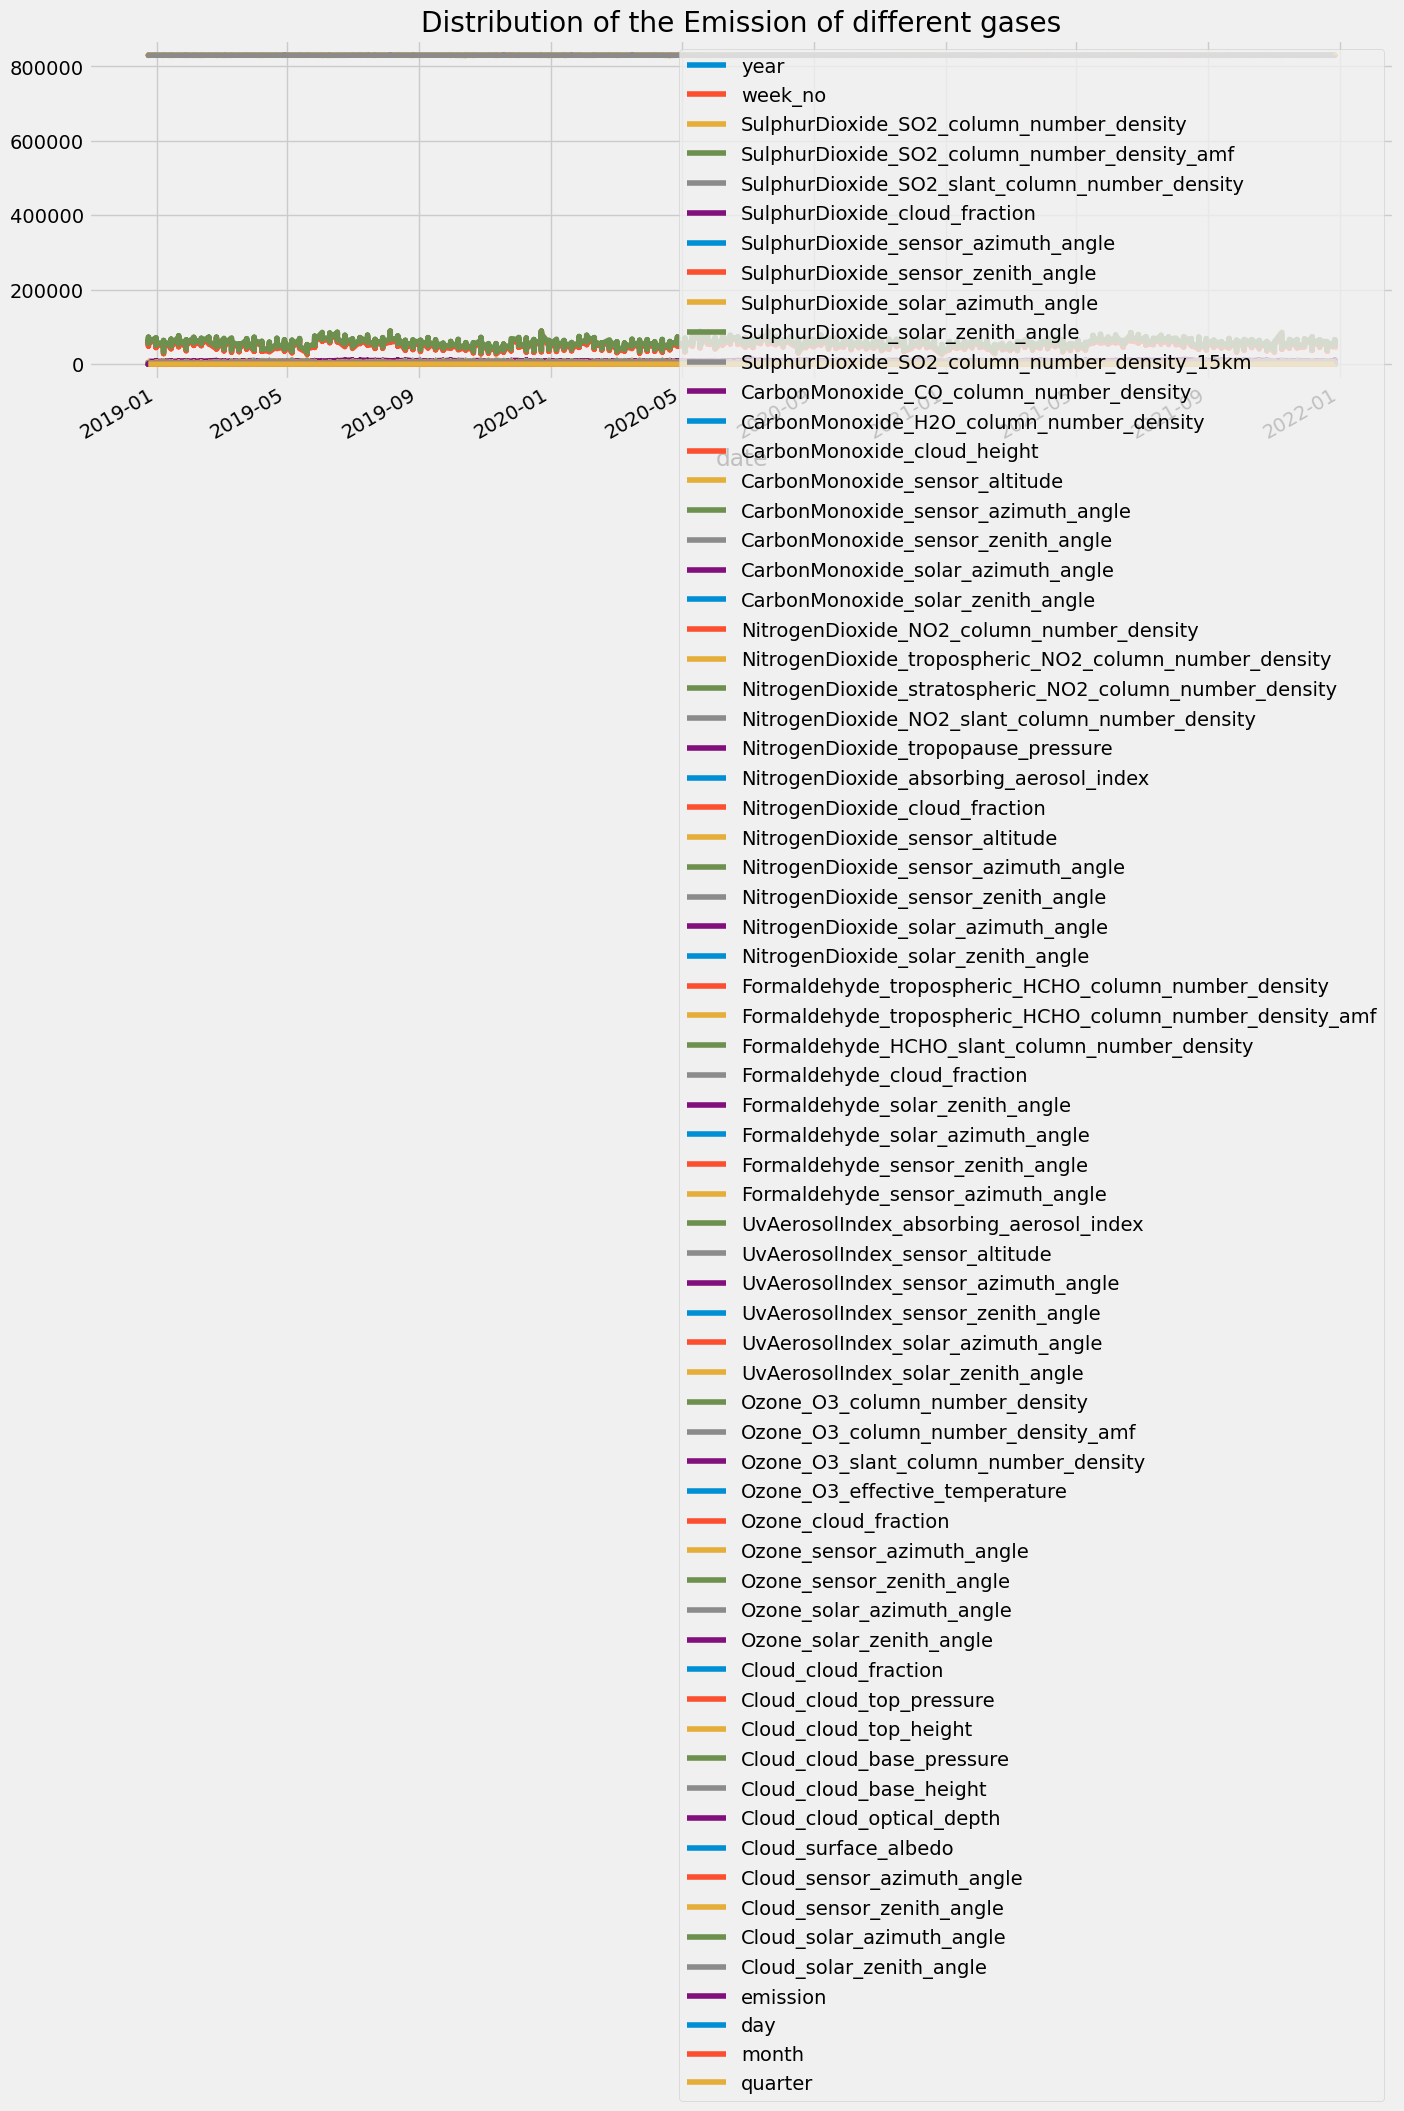

In [110]:
# emission_data.plot(style='.',figsize=(15, 5), color=color_pal[0])

emission_data.plot(style='-',figsize=(15, 5), title="Distribution of the Emission of different gases")

<Axes: title={'center': 'Distribution of the Emission'}, xlabel='date'>

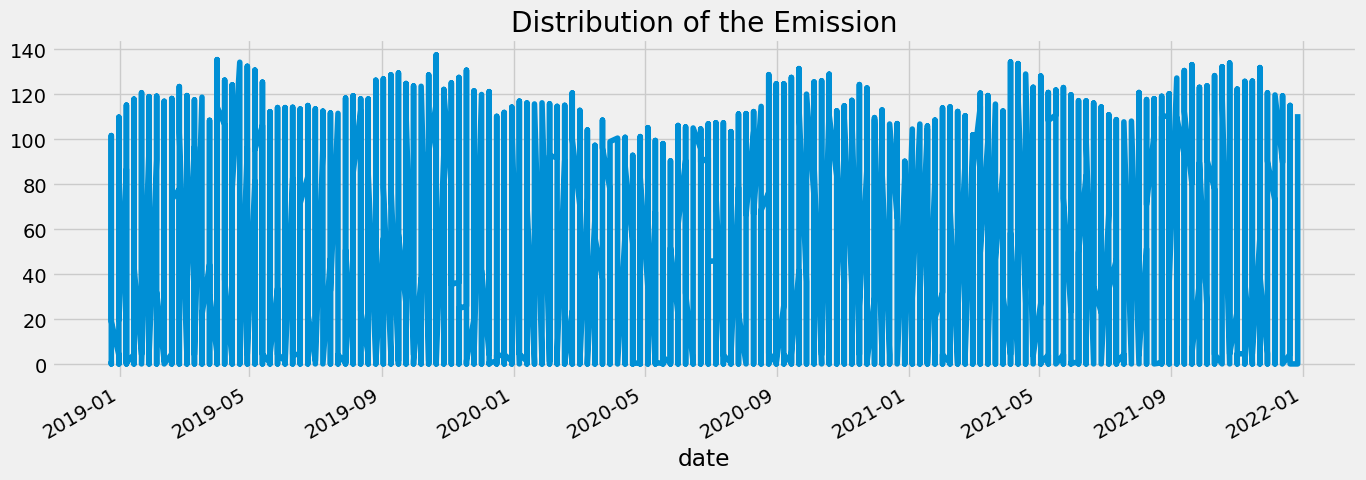

In [109]:
# Visualize each column

emission_data['emission'].plot(style='-',figsize=(15, 5), title="Distribution of the Emission")

<Axes: title={'center': 'First week in January 2019'}, xlabel='date'>

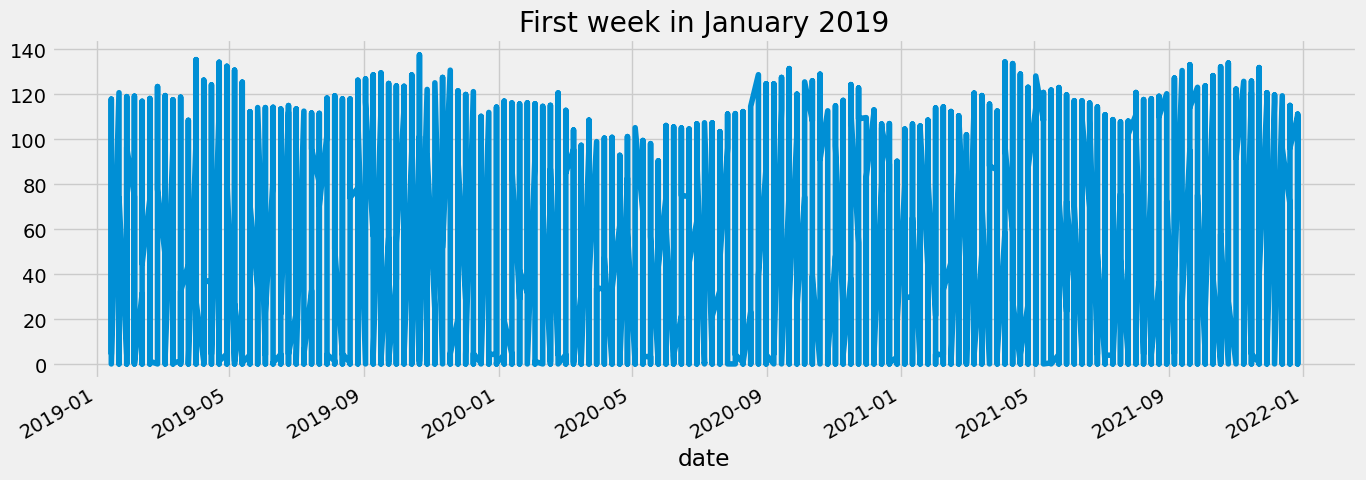

In [108]:
# Look at the weekly trend
# Just a subset of year 2019

emission_data.loc[(emission_data.index > '2019-01-01') & (emission_data.index > '2019-01-08')]['emission'].plot(style='-',figsize=(15, 5), title="First week in January 2019")

C:\Users\harve\AppData\Local\Temp\ipykernel_26620\1214860855.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=emission_data, x='week_no', y='emission', palette=custom_palette)


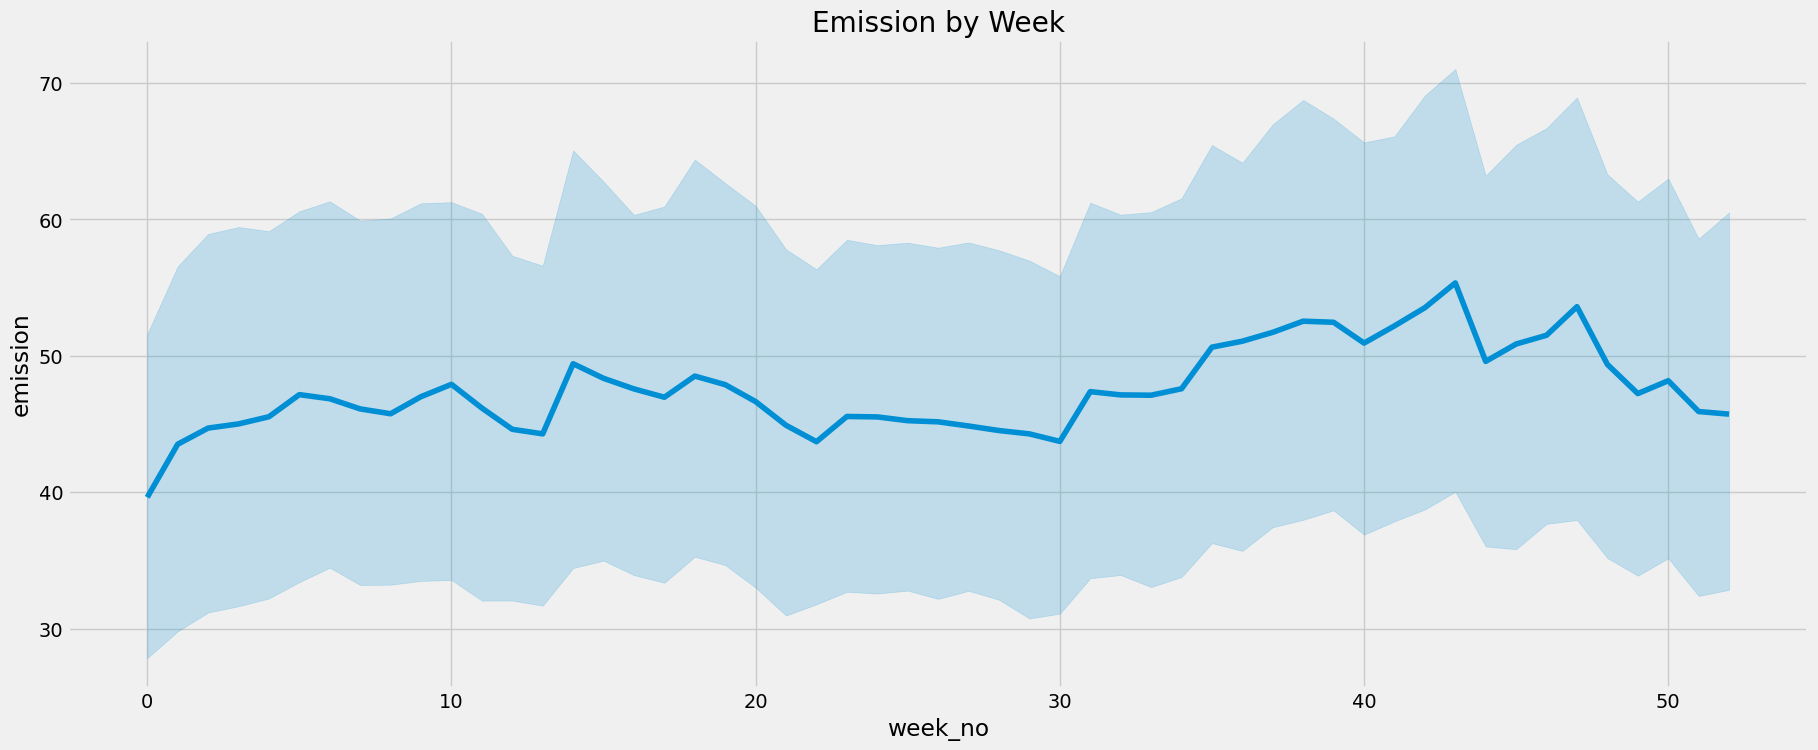

In [107]:

custom_palette = sns.color_palette("Set1")

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=emission_data, x='week_no', y='emission', palette=custom_palette)
ax.set_title('Emission by Week')
plt.show()

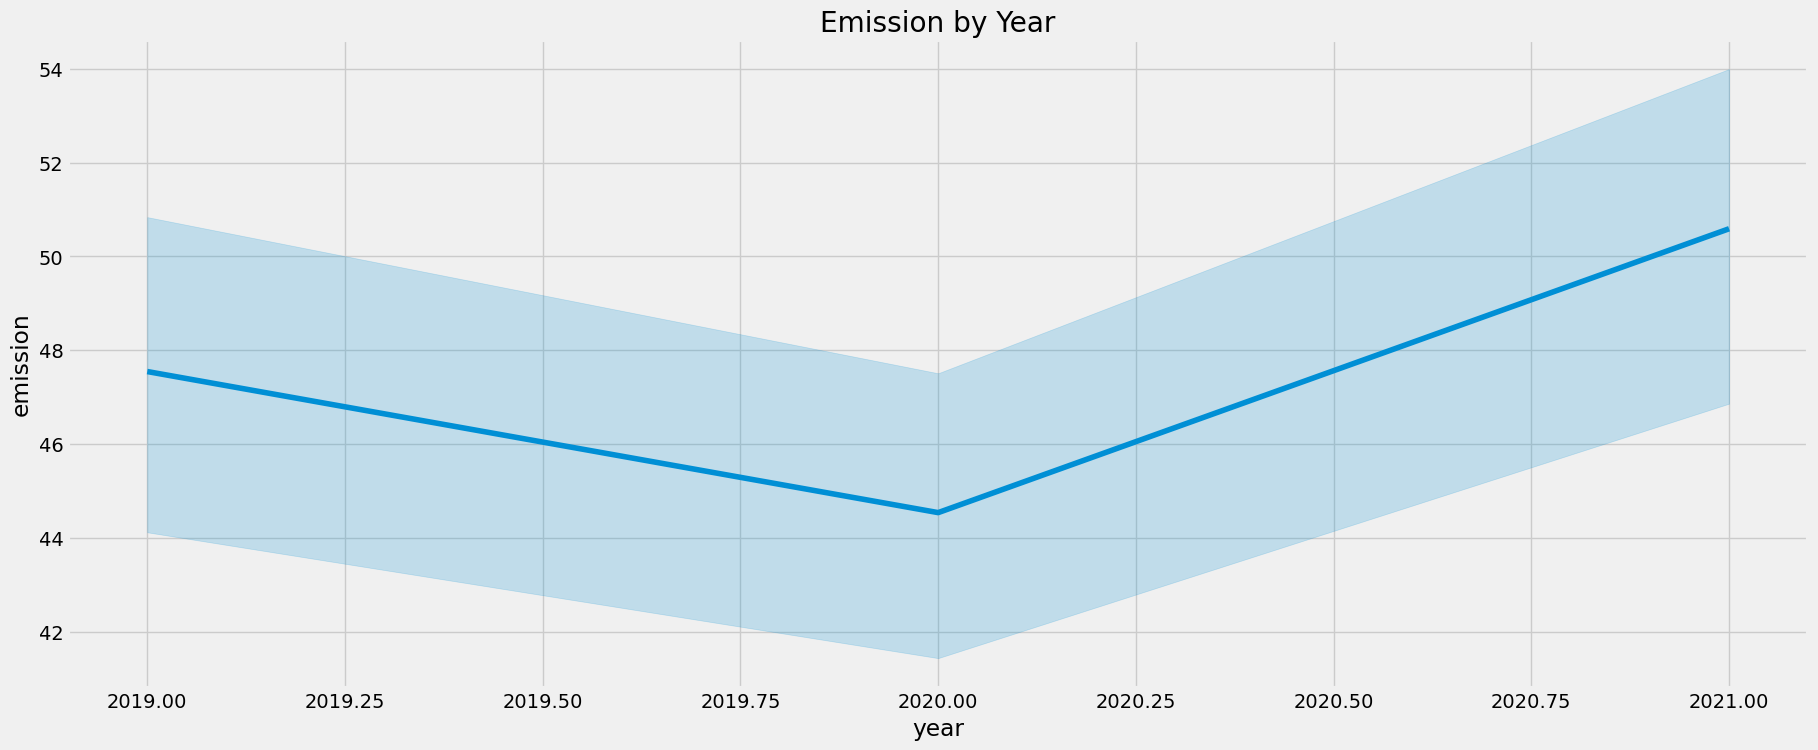

In [106]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=emission_data, x='year', y='emission')
ax.set_title('Emission by Year')
plt.show()

C:\Users\harve\AppData\Local\Temp\ipykernel_26620\4077473398.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=emission_data, x='quarter', y='emission', palette='Blues')


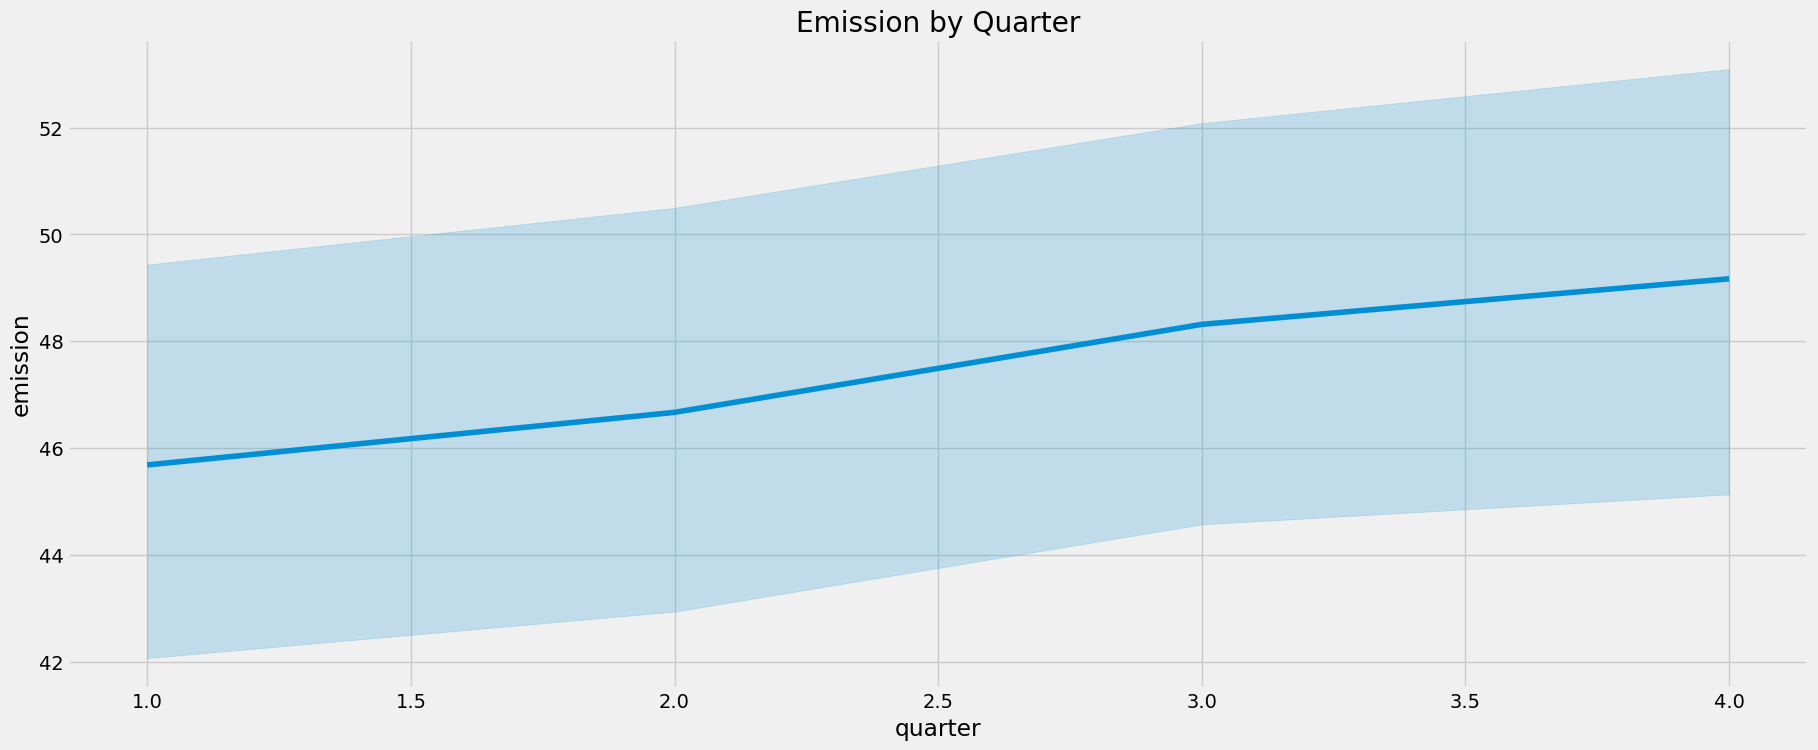

In [104]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=emission_data, x='quarter', y='emission', palette='Blues')
ax.set_title('Emission by Quarter')
plt.show()

C:\Users\harve\AppData\Local\Temp\ipykernel_26620\1815774023.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=emission_data, x='month', y='emission', palette='Blues')


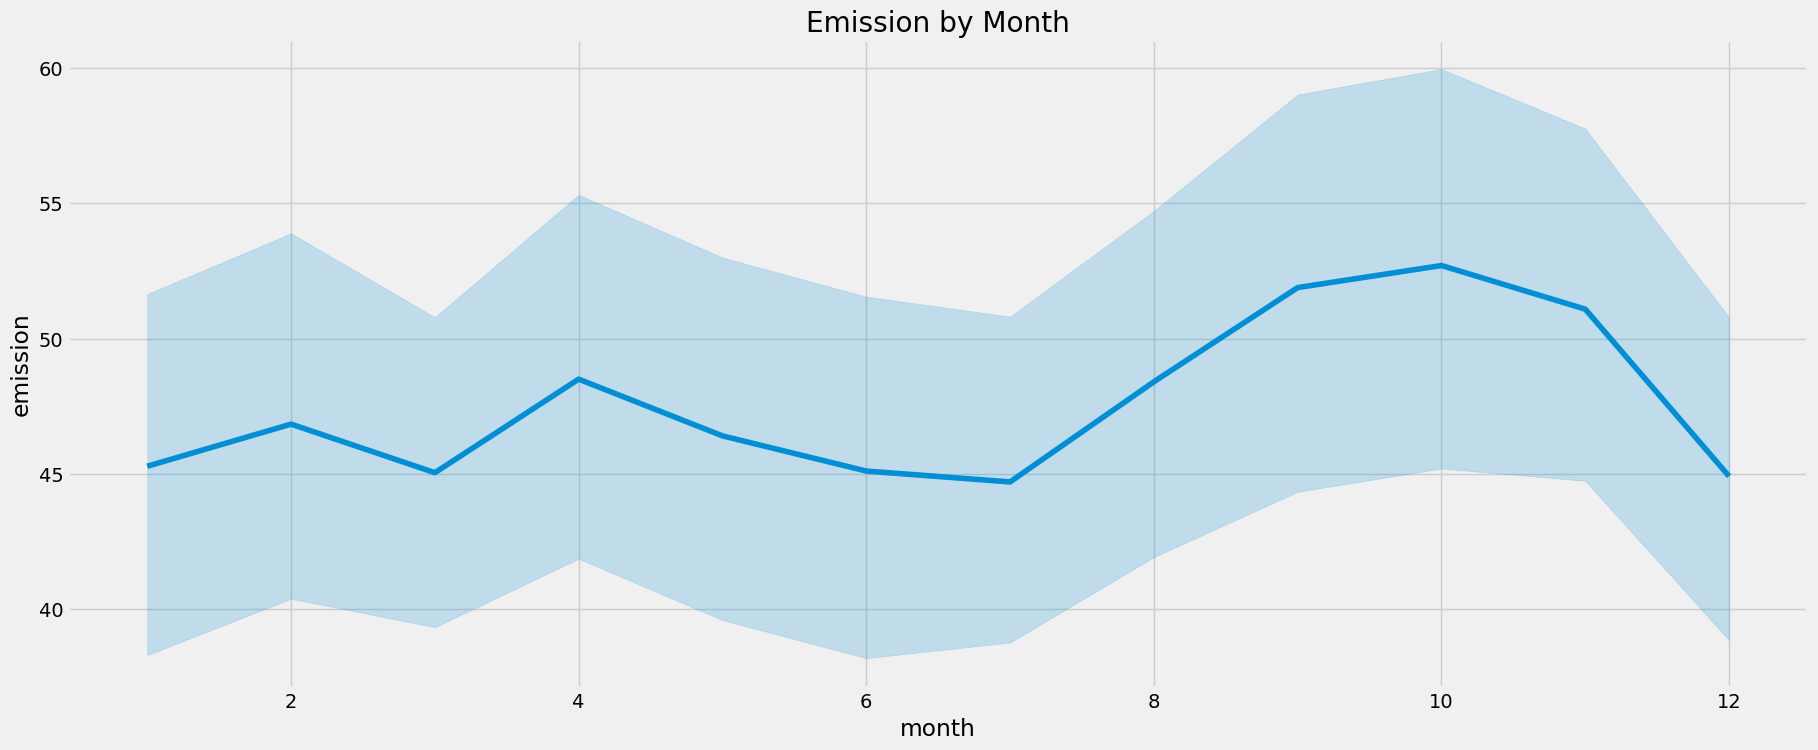

In [103]:

fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=emission_data, x='month', y='emission', palette='Blues')
ax.set_title('Emission by Month')
plt.show()

C:\Users\harve\AppData\Local\Temp\ipykernel_26620\3718050977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=emission_data, x='day', y='emission', palette='Blues')


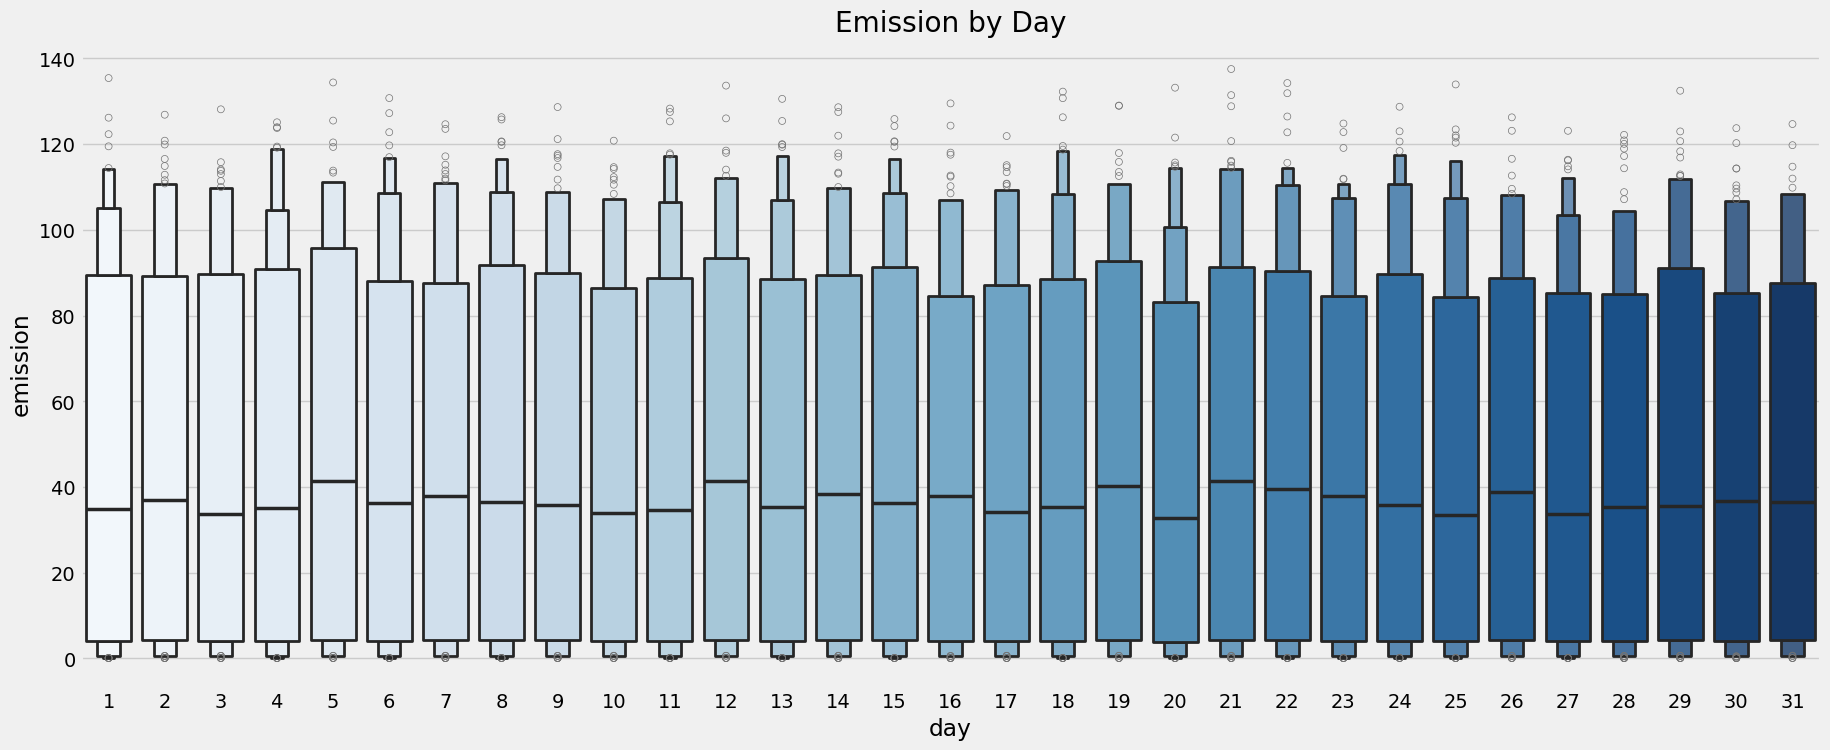

In [95]:

fig, ax = plt.subplots(figsize=(20,8))
sns.boxenplot(data=emission_data, x='day', y='emission', palette='Blues')
ax.set_title('Emission by Day')
plt.show()

In [102]:
# train = emission_data.loc[emission_data < '2019-01-01']
# test = emission_data.loc[emission_data >= '2019-01-01']


# fig, ax = plt.subplots(figsize=(15,5))
# train.plot(ax=ax, label = 'Training Set', title='Data Train/Test Split)
# test.plot(ax=ax, label = 'Test Set')
# ax.axvline('2019-01-01', color='black', ls='--')
# ax.legend(['Training set', 'Test Set'])
# plt.show()

train = emission_data
# test = emission_data_test

Train/Test Split

We don't need to split the dataset since we already have a test dataset.

In [97]:
FEATURES = ['day', 'month', 'year', 'quarter']
TARGET = 'emission'

In [98]:
X_train = train[FEATURES]
y_train = train[TARGET]

# X_test = test[FEATURES]
# y_test = test[TARGET]

In [99]:
# Model building
# XGBoost Regressor

reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds=50, learning_rate=0.001)
reg.fit(X_train, y_train,
         eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

SyntaxError: invalid syntax (2800097201.py, line 4)

In [ ]:
# Feature importance
feat_importance = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])

feat_importance

In [ ]:
# Visualize on a bar plot

feat_importance.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [ ]:
# Forecast on the test dataset

# test['prediction'] = reg.predict(X_test)


In [ ]:
# emission_data_pred = emission_data.merge(test[['prediction']], how='left', left_index=True, right_index=True)

In [ ]:
ax = emission_data_pred[['emission']].plot(figsize=(15,5))
emission_data['prediction'].plot(ax=ax, style='.')
plt.legend(['True Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [ ]:
# Evaluation metric using RMSE

score = np.sqrt(mean_squared_error(emission_test_data['emission'], emission_test_data['prediction']))

print(f'RMSE Score on test set: {score:0.2f}')

# Calculate R-squared
r2 = r2_score(test['Time(hrs)'], test['prediction'])

print(f'R-squared: {r2:.2f}')